In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
jj = pd.read_excel('jj202301.v1.xlsx')
jj.tail()

,Date,Day of Week,Payment Type,Customer ID,Approval,Order 1,Price 1,Cost 1,Order 2,Price 2,...,Price 9,Cost 9,Order 10,Price 10,Cost 10,Payment,Commision,Total VAT,Total Fee,Revenue
92,2023-01-30,Monday,CREDIT,1LSBR0,PAY,스트로베리 레몬 브리즈 (Strawberry Lemon Breeze),6500,2838.9300,베리 바나나 그릭요거트,7500,...,NaN,NaN,NaN,NaN,NaN,14000,4556,455,5011,8989
93,2023-01-30,Monday,CREDIT,04RJ80,PAY,스트로베리 레몬 브리즈 (Strawberry Lemon Breeze),6500,2838.9300,아보카도 바나나 블리스 (Avocado Banana Bliss),6500,...,NaN,NaN,NaN,NaN,NaN,20500,5388,538,5926,14574
94,2023-01-30,Monday,CREDIT,0FJ680,PAY,ABC 주스,7000,1274.8000,사과 레몬 케일 샐러리 주스,7000,...,NaN,NaN,NaN,NaN,NaN,20800,5426,542,5968,14832
95,2023-01-30,Monday,CREDIT,1FSF00,PAY,오렌지 주스,6500,1287.0000,사과 주스,7000,...,NaN,NaN,NaN,NaN,NaN,37700,10226,1023,11249,26451
96,2023-01-31,Tuesday,CREDIT,29X380,PAY,수박 주스,7500,715.3125,청포도 주스,7000,...,NaN,NaN,NaN,NaN,NaN,14300,4594,459,5053,9247


/var/folders/_m/4k5rm_gn2n7632wfv66lf1rm0000gn/T/ipykernel_97329/2094394804.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = jj.groupby('Day of Week')['Revenue'].sum().reindex(day_order)


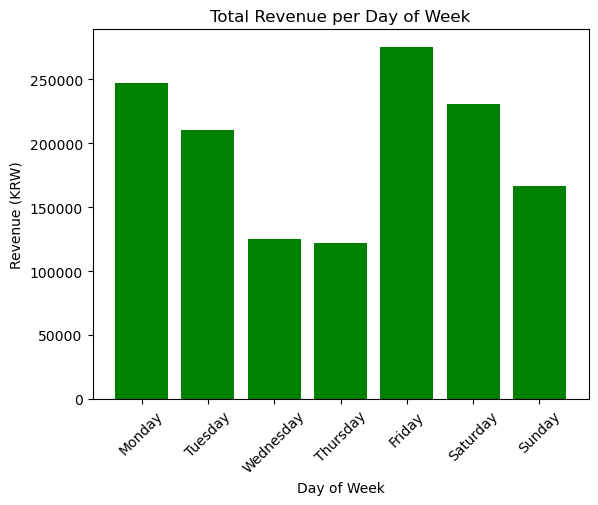

In [60]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
jj['Day of Week'] = pd.Categorical(jj['Day of Week'], categories=day_order, ordered=True)

# Group by 'Day of Week' and sum the 'Revenue'
grouped = jj.groupby('Day of Week')['Revenue'].sum().reindex(day_order)

# Plot the total revenue per day of the week
plt.bar(grouped.index, grouped.values, color='g')

plt.xlabel("Day of Week")
plt.ylabel("Revenue (KRW)")
plt.title("Total Revenue per Day of Week")
plt.xticks(rotation=45)
plt.show()

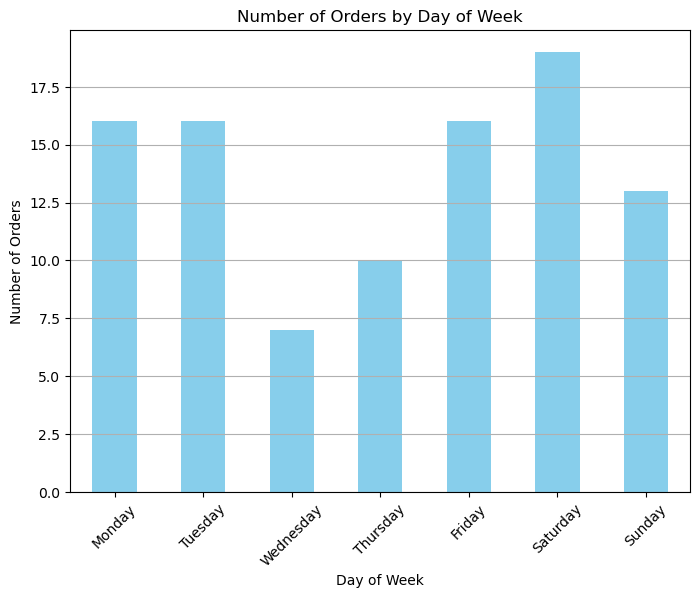

In [24]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = jj['Day of Week'].value_counts().reindex(days_of_week)

plt.figure(figsize=(8, 6))
day_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

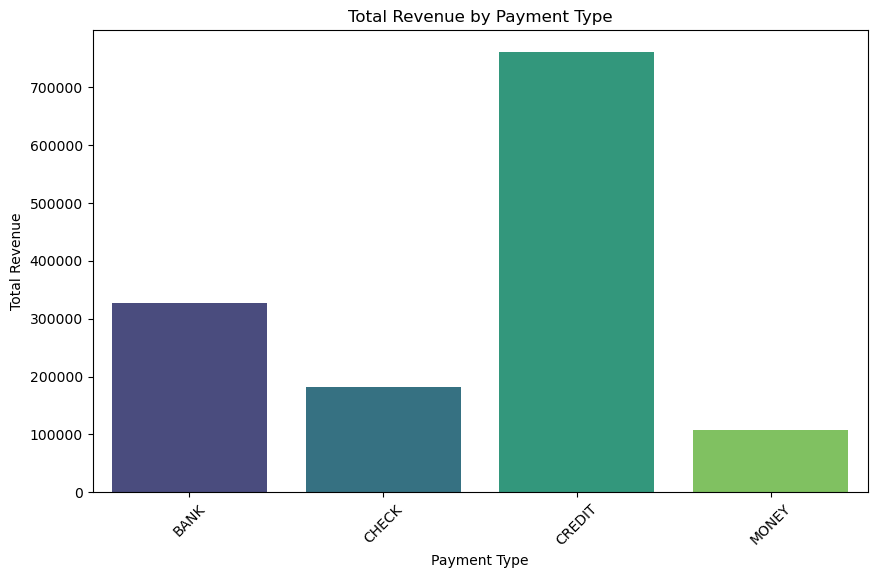

In [26]:
# Grouping the data by Payment Type and calculating total revenue for each type
payment_type_revenue = jj.groupby('Payment Type')['Revenue'].sum().reset_index()

# Plotting Payment Type vs. Total Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Type', y='Revenue', data=payment_type_revenue, palette='viridis')
plt.title('Total Revenue by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

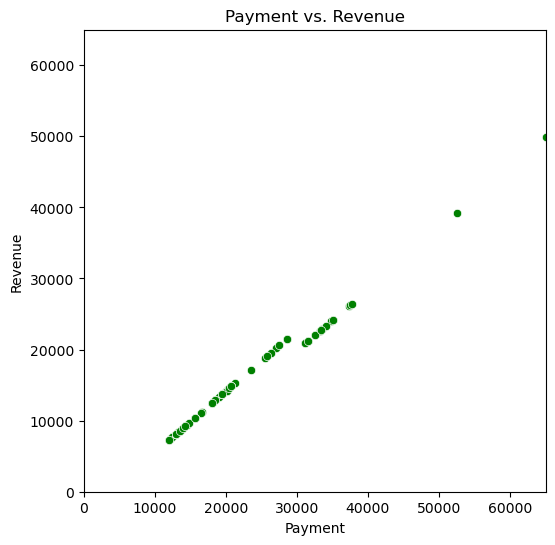

Correlation coefficient between Payment and Revenue: 0.9958030169596785


In [28]:
max_value = max(jj['Payment'].max(), jj['Revenue'].max())

# Plotting Payment vs. Revenue with equal scales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Payment', y='Revenue', data=jj, color='g')
plt.title('Payment vs. Revenue')
plt.xlabel('Payment')
plt.ylabel('Revenue')

# Setting the same limits for both axes
plt.xlim(0, max_value)
plt.ylim(0, max_value)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

correlation = jj['Payment'].corr(jj['Revenue'])
print(f'Correlation coefficient between Payment and Revenue: {correlation}')

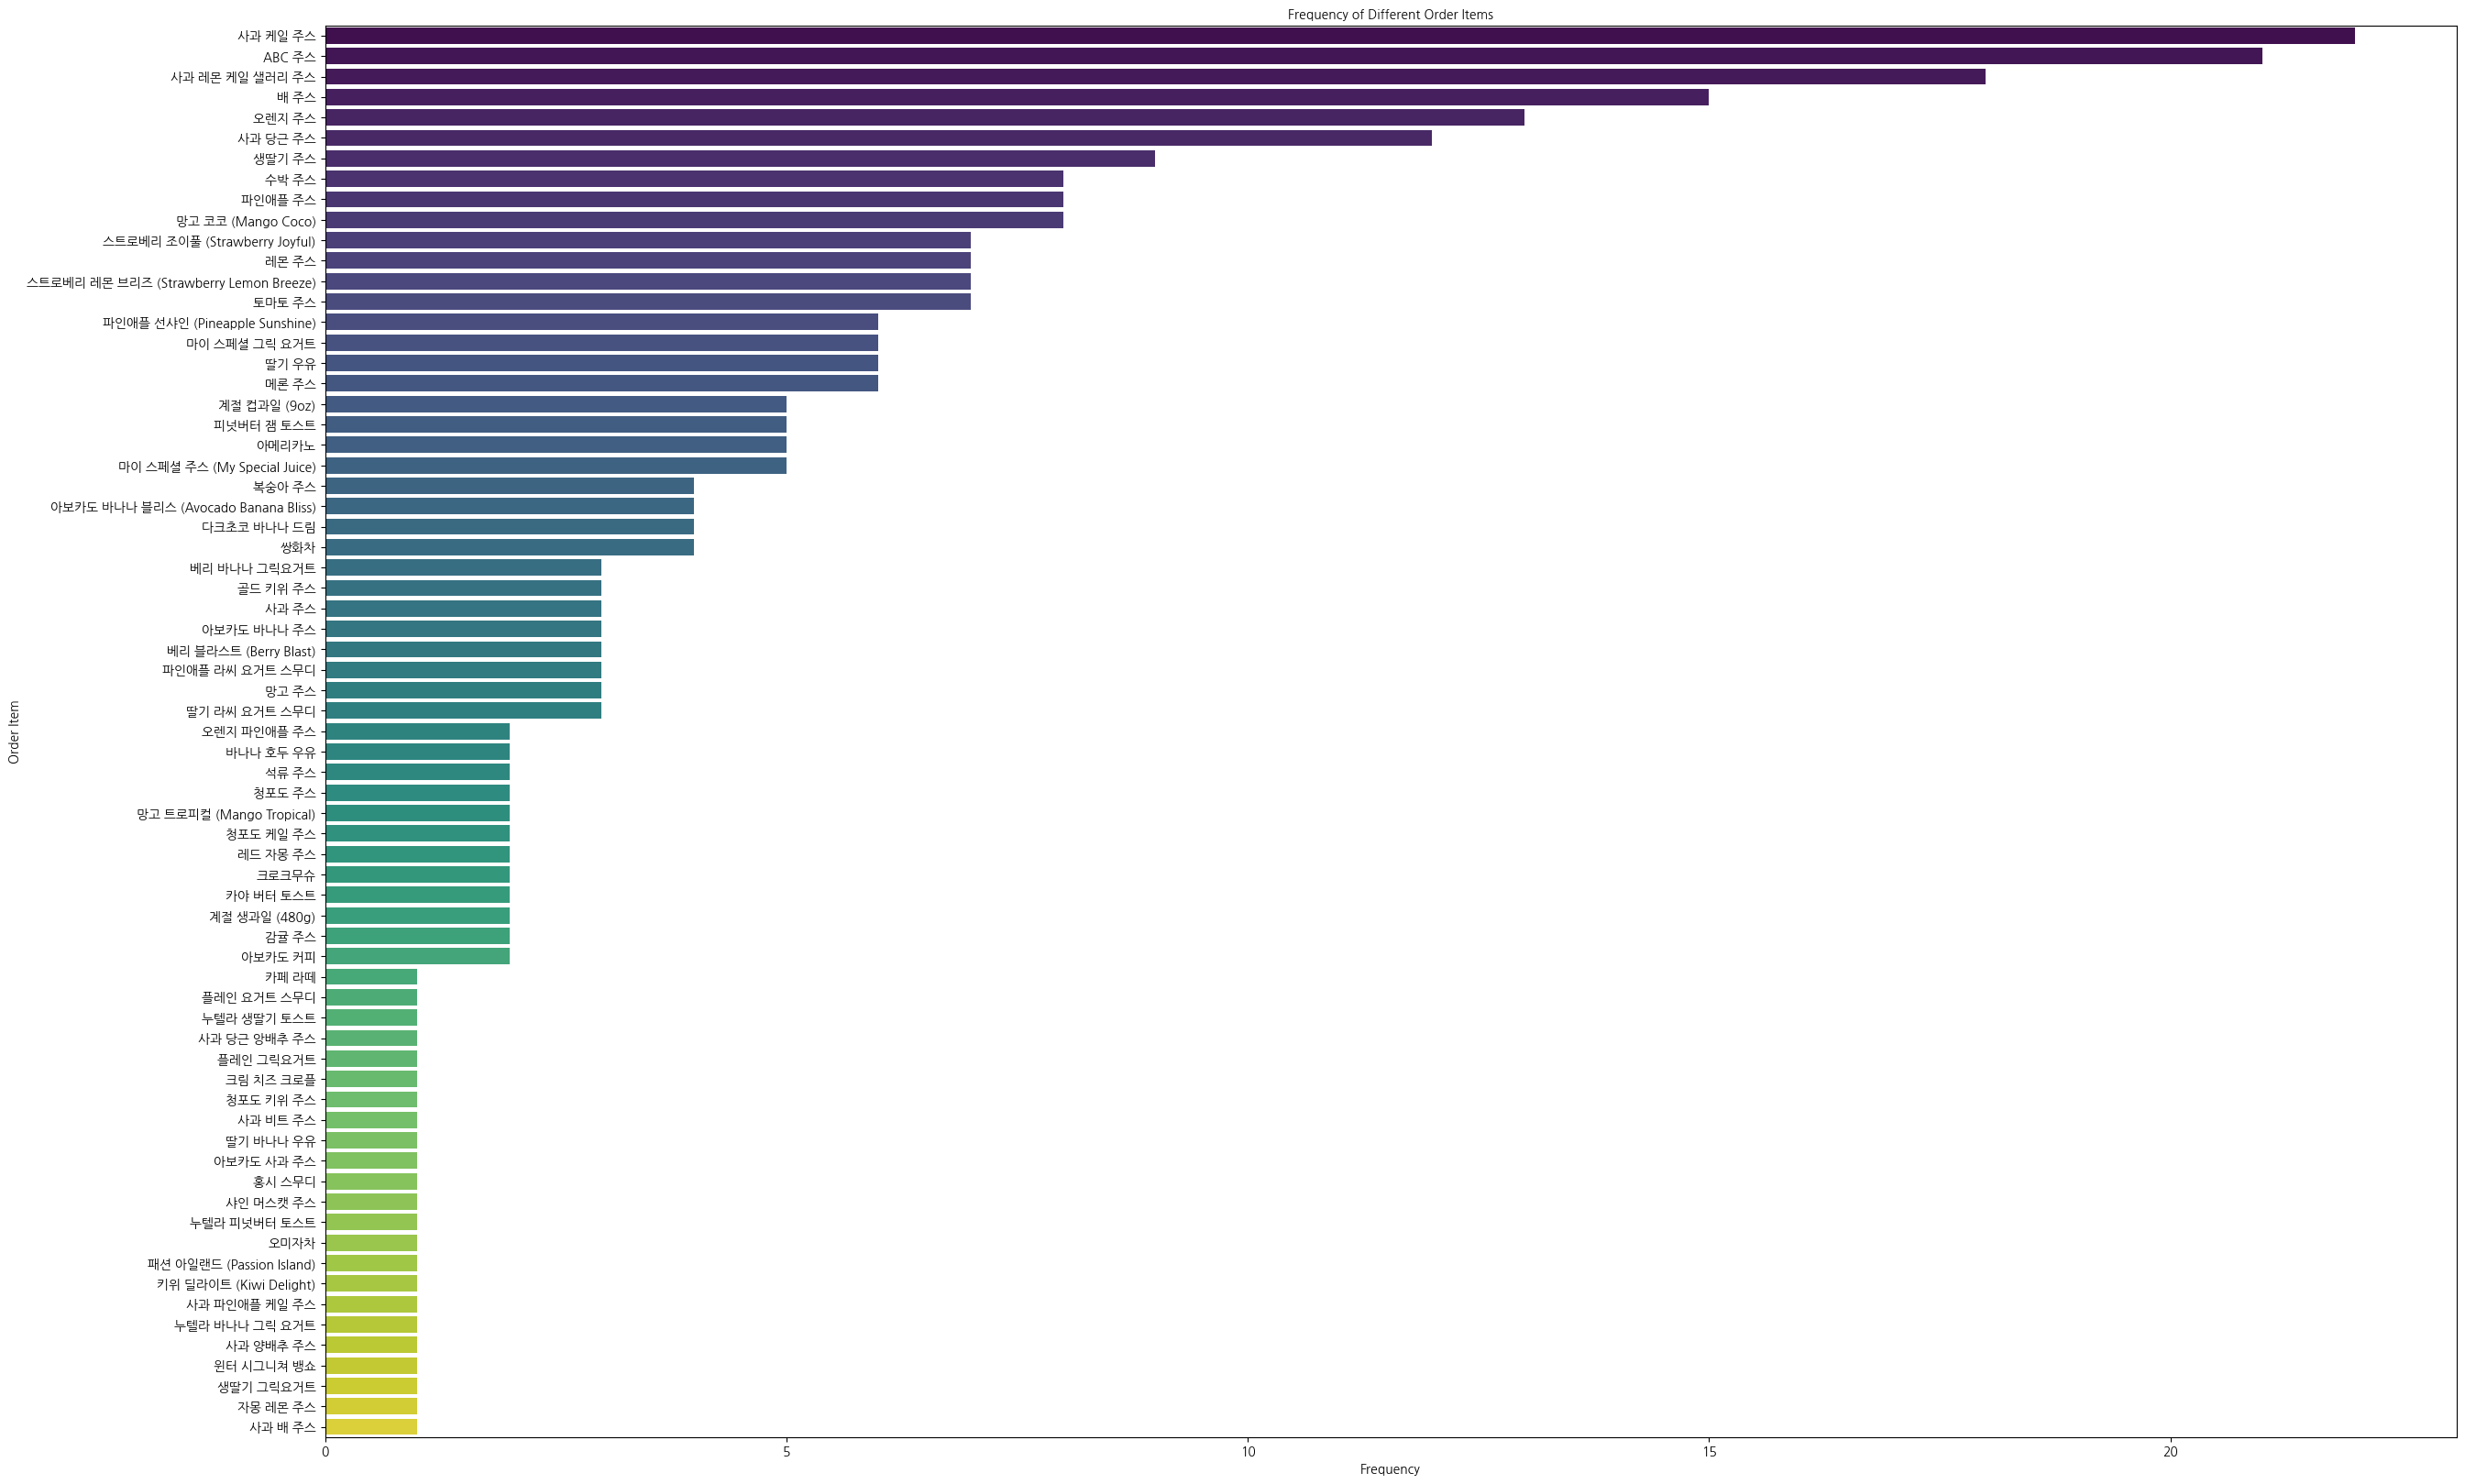

In [30]:
import matplotlib.font_manager as fm

# Extract orders
order_columns = ['Order 1', 'Order 2', 'Order 3', 'Order 4', 'Order 5', 'Order 6']
all_orders = jj[order_columns].values.flatten()

# Create a DataFrame from the orders
order_df = pd.DataFrame(all_orders, columns=['Order'])

# Drop NaN values
order_df = order_df.dropna()

# Calculate the frequency of each unique order item
order_frequency = order_df['Order'].value_counts().reset_index()
order_frequency.columns = ['Order Item', 'Frequency']

# Path to the downloaded NanumGothic font file
font_path = '/Users/CMW/Documents/NanumGothic-Regular.ttf'  # Update this with the correct path
nanum_font = fm.FontProperties(fname=font_path)

# Plotting the frequency of order items with the specified font
plt.figure(figsize=(30, 20))
sns.barplot(x='Frequency', y='Order Item', data=order_frequency, palette='viridis')
plt.title('Frequency of Different Order Items', fontproperties=nanum_font)
plt.xlabel('Frequency', fontproperties=nanum_font)
plt.ylabel('Order Item', fontproperties=nanum_font)
plt.xticks(fontproperties=nanum_font)
plt.yticks(fontproperties=nanum_font)
plt.show()